Brennan Duff
Comparison of MLP and CNN on CIFAR-10 Dataset

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_5 (Dense)             (None, 200)               614600    
                                                                 
 dropout_3 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 150)               30150     
                                                     

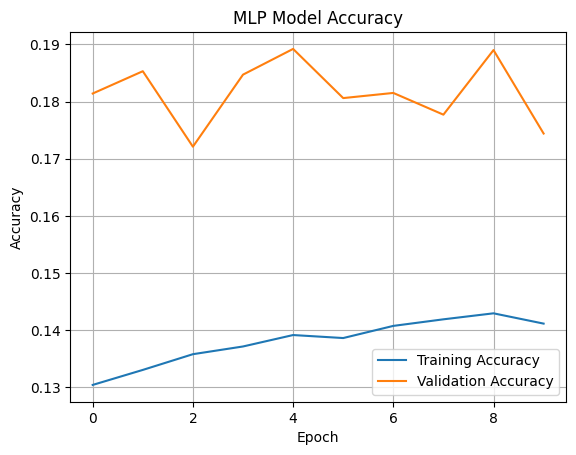

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

#Load dataset and normalize images
num_classes = 10

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

display(x_train[:10])
print(y_train[:10])

def create_mlp_model(input_shape, num_classes=10):
    model = models.Sequential()

    #Flatten the input
    model.add(layers.Flatten(input_shape=input_shape))

    #First Dense layer with ReLU activation
    model.add(layers.Dense(200, activation='relu'))

    #Add Dropout to prevent overfitting
    model.add(layers.Dropout(0.5))

    #Second Dense layer with ReLU activation
    model.add(layers.Dense(150, activation='relu'))

    #Add another Dropout layer
    model.add(layers.Dropout(0.5))

    #Output layer with softmax activation
    model.add(layers.Dense(num_classes, activation='softmax'))

    #Compile the model with Adam optimizer and sparse categorical crossentropy
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

#Assuming data is already preprocessed
mlp_model = create_mlp_model(input_shape=(32, 32, 3))

#Summary of the model
mlp_model.summary()

#Training the model with validation split
history = mlp_model.fit(
    x_train,
    y_train.argmax(axis=-1),  #Convert one-hot to labels for sparse categorical loss
    batch_size=32,
    epochs=10,
    validation_split=0.2,  #Use 20% of the data for validation
    shuffle=True
)

#Evaluate the model on the test set
mlp_model.evaluate(x_test, y_test.argmax(axis=-1))

#Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('MLP Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)      

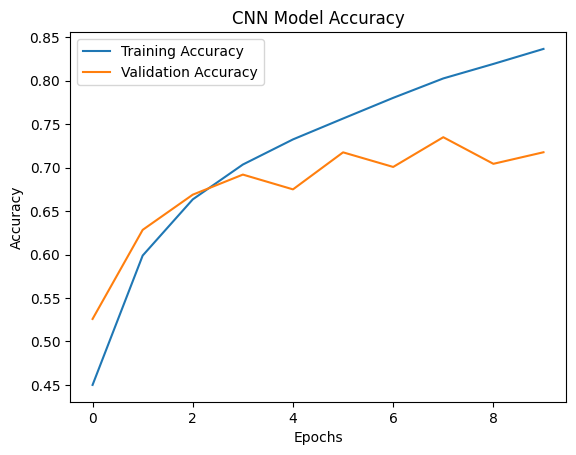

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

#Load dataset and normalize images
num_classes = 10

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

display(x_train[:10])
print(y_train[:10])

def create_cnn_model(input_shape, num_classes=10):
    model = models.Sequential()

    #First Conv2D layer
    model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    #Second Conv2D layer with stride of 2 to reduce spatial dimensions
    model.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    #Third Conv2D layer
    model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    #Fourth Conv2D layer with stride of 2
    model.add(layers.Conv2D(filters=64, kernel_size=3, strides=2, padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    #Flatten the output
    model.add(layers.Flatten())

    #Fully connected layer with 128 units
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())
    model.add(layers.Dropout(0.5))

    #Output layer with softmax activation for classification
    model.add(layers.Dense(num_classes, activation='softmax'))

    #Compile the model with Adam optimizer and sparse categorical crossentropy
    model.compile(
        optimizer=optimizers.Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

#Create the model
cnn_model = create_cnn_model(input_shape=(32, 32, 3))

#Model summary
cnn_model.summary()

#Train the model with validation split
history = cnn_model.fit(
    x_train,
    y_train.argmax(axis=-1),  # Convert one-hot to labels
    batch_size=32,
    epochs=10,
    validation_split=0.2,  # 20% validation split
    shuffle=True
)

#Evaluate the model on the test set
cnn_model.evaluate(x_test, y_test.argmax(axis=-1))

#Plotting training and validation accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('CNN Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

#Plot the training and validation accuracy
plot_accuracy(history)

Performance: MLP model had low performance throughout testing and validation, never having more than .2 accuracy. The loss stayed the same, at around 2.2, dipping to 2.15 at the end of testing. The CNN model did much better, reaching around .83 at the end of testing and having a loss of .46.

Model complexity: CNNs have hierarchical feature learning, which allows the deeper layers to build upon features learned in earlier layers. early layers can detect simple shapes and features, which are combined in later layers to form complex features and shapes. MLPs do not have this, so they are not able to easily learn these features and suffer lower accuracy as a result.

Training Time: The MLP model trained at a rate of around 6-7 seconds per epoch, while the CNN trained at a rate of around 26-29 seconds, making the MLP signifcantly faster to train.

Overfitting and Regularization: The MLP model does not seem to suffer from overfitting, as the validation accuracy is greater than the testing accuracy. The CNN however, has around .15 less accuracy on its validation scores at later testing stages, which means that it could be overfitting. Dropout randomly sets the neurons values in the neural network to 0 for a certain amount of nuerons to force the network to use all of the neurons availible instead of relying on one specific path through the network.